# **Churn Problem for Bank Company**

* It is much more expensive to sign in a new client than keeping an existing one.





* It is advantageous for banks to know what leads a client towards the decision to leave the company.


* Churn prevention allows companies to develop loyalty programs and retention 
campaigns to keep as many customers as possible.



**The aim is to estimate whether a bank's customers leave the bank or not.**

In [160]:
# Mount the Google Drive to Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing Packages


In [161]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.svm import SVC

In [162]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Reading Data from Drive:

In [163]:
df = pd.read_csv('/content/gdrive/MyDrive/archive.zip')

In [164]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [165]:
df.shape

(10000, 14)

It consists of 10000 observations and 14 variables.

In [166]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [167]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Features:**
* **RowNumber**: corresponds to the record (row) number.
* **CustomerId**: contains random values.
* **Surname**: the surname of a customer.
* **CreditScore**: Credit score of a customer.
* **Geography**: a customer’s location.
* **Gender**: Gender (Female / Male).
* **Age**: a customer’s age.
* **Tenure**: refers to the number of years that the customer has been a client of the bank.
* **Balance**: the balance in the custumer's account.
* **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
* **HasCrCard**: denotes whether or not a customer has a credit card (0 = No, 1 = Yes)
* **IsActiveMember**: Active membership status (0 = No, 1 = Yes)
* **EstimatedSalary**: the custumer salarie.
* **Exited**: whether or not the customer left the bank (0 = No, 1 = Yes).

As **RowNumber**, **CustomerId** and **Surname** has no effect on the output, we are going to drop those columns.


In [168]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [169]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's check missing values:

In [171]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The provided Dataset is quite clean, we don't have NaN values.

Now let's explore the remaining data.

# Exploring data

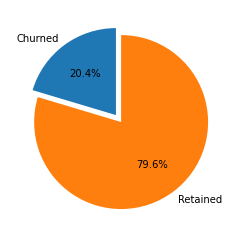

In [172]:
labels = ["Churned", "Retained"]
y = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
plt.pie(y, labels = labels, explode = explode, startangle = 90, autopct='%1.1f%%',)
plt.show() 

 20.4 % of costumers left the bank.

## **Exploring categorical variables**:

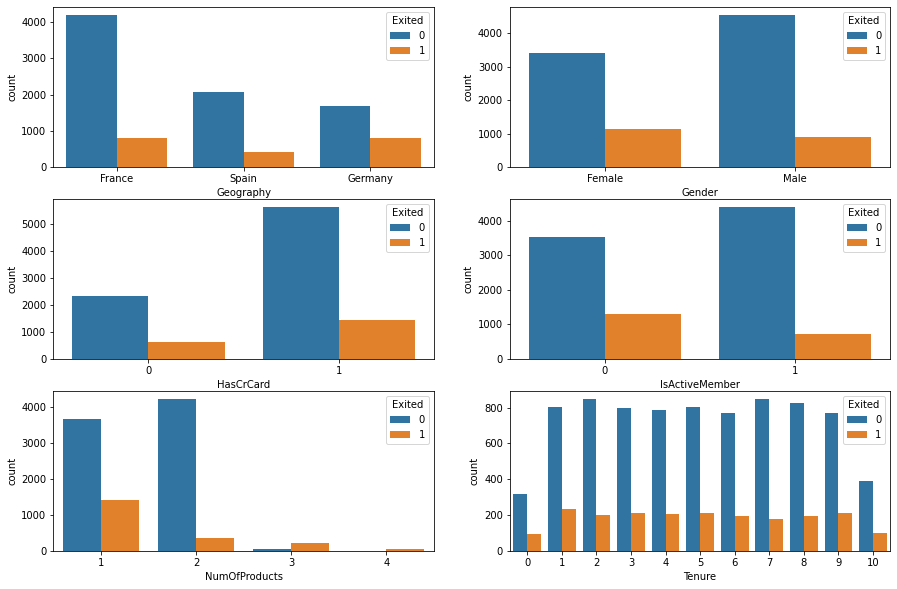

In [173]:
fig, sty = plt.subplots(3, 2, figsize=(15, 10))
sns.countplot(data = df, x='Geography', hue='Exited', ax = sty[0][0])
sns.countplot(data = df, x='Gender', hue = 'Exited', ax = sty[0][1])
sns.countplot(data = df, x='HasCrCard', hue = 'Exited',ax = sty[1][0])
sns.countplot(data = df, x='IsActiveMember', hue = 'Exited', ax = sty[1][1])
sns.countplot(data = df, x='NumOfProducts' , hue='Exited', ax = sty[2][0])
sns.countplot(data = df, x='Tenure' , hue='Exited', ax = sty[2][1])

**From the analysis of the graphics we can say that:**
* Customers mainly live in France, the number of customers living in Germany and Spain is very close.
 The French tend to stay with the bank, Germans tend to live the bank.
* Males tend to stay with the bank.
* Customers usually hold credit cards. Presence of a credit card does not seem to affect the exits.
* Customers use the bank more actively, active members seem to stay.

* The more products the customer has purchased through the bank, the less likely he is to leave.
* The number of years that the customer has been a client of the bank does not seem to affect the exits.



## **Exploring Continuous variables:**

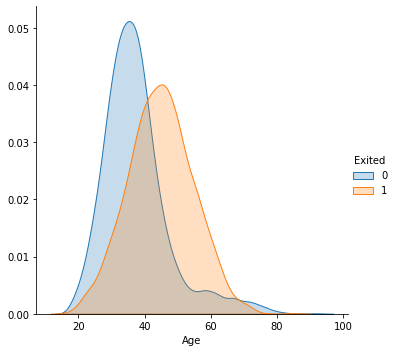

In [174]:
sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Age", shade= True).add_legend()


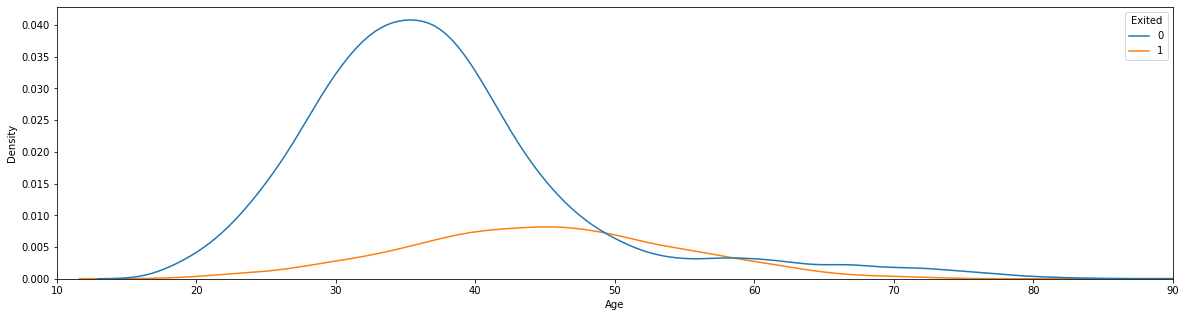

In [175]:
plt.figure(figsize=(20,5))
plt.xlim(10,90)
sns.kdeplot(data=df, x="Age", hue="Exited")
plt.show()

In [176]:
df.groupby(df["Exited"])["Age"].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

As the age of the customer increases, the customer losing rate increases.


Average age of customers who did not leave the bank = 37.


Average age of customers leaving the bank = 44.

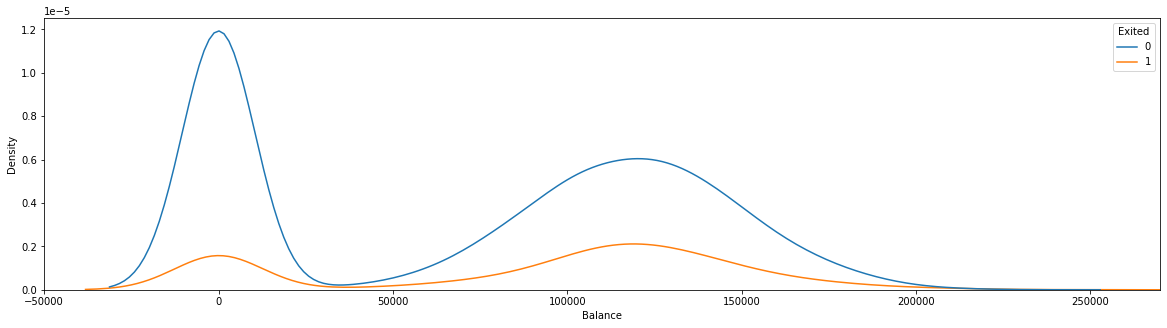

In [177]:
plt.figure(figsize=(20,5))
plt.xlim(-50000,270000)
sns.kdeplot(data=df, x="Balance", hue="Exited")
plt.show()

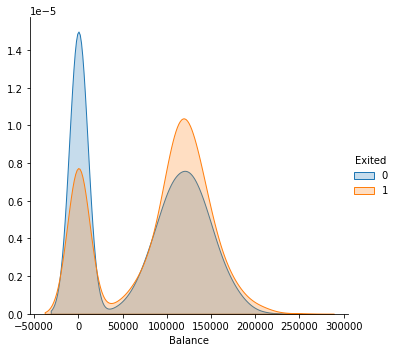

In [178]:
sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Balance", shade= True).add_legend()

There is a high number of customers with 0 account balance.

# Outliers:

Finding and Removing Outliers in variables.

For that We use the boxplot graph.

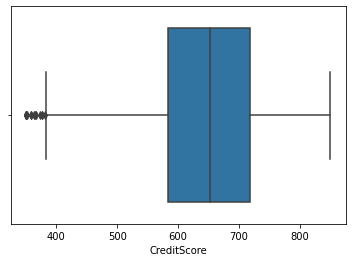

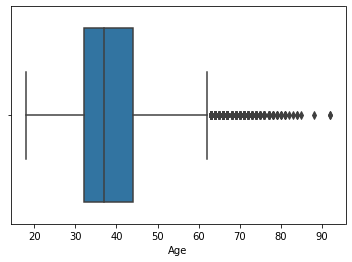

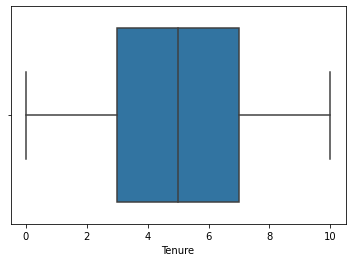

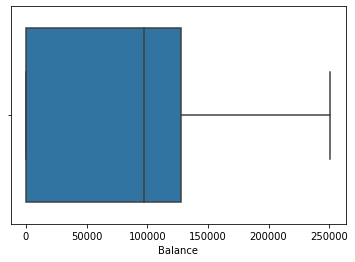

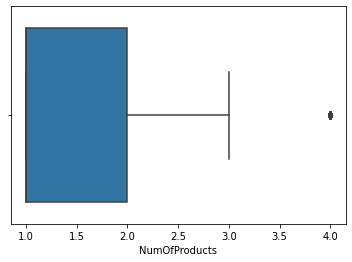

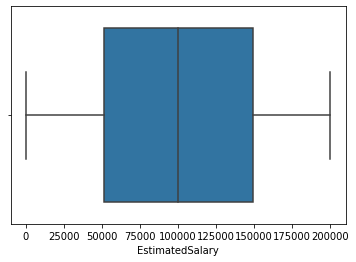

In [179]:
outlier_plot = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
for i in outlier_plot:
    sns.boxplot(x = df[i])
    plt.show()

Seems like CreditScore, Age, NumOfProducts have outliers

In [180]:
# remove outliers 
def outlier(df,columns):
  for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
  return df

Cleaning the dataset by removing outliers:

In [181]:
columns = ['CreditScore', 'Age', 'NumOfProducts']

df = outlier(df, columns)

print(df.shape)


(9515, 11)


## **Correlation Matrix**:

Looking at Correlations between the variables



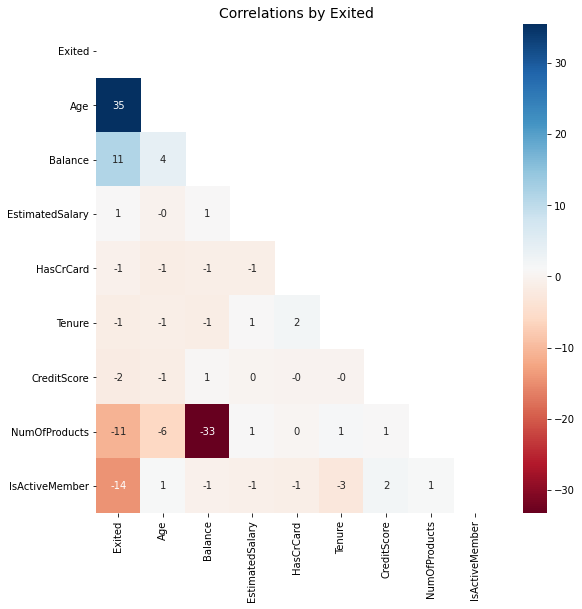

In [182]:
# Calculate correlations between numeric features
correlations = df.corr()

# sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

# Generate a mask for the upper triangle
corr_mask = np.zeros_like(df.corr())
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
sns.heatmap(sort_corr*100, 
                cmap='RdBu', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,)

plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()

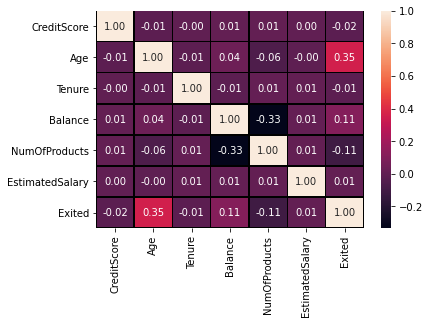

In [183]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f')

1. Age has the strongest relation with Exited. As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)
2. Exited and Balance variable have a relatively strong relationship.
3. Exited and the variable NumOfProducts have a moderately strong relationship. They have a strong negative relationship.

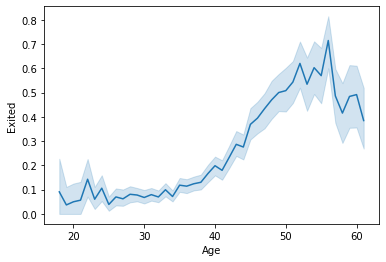

In [184]:
sns.lineplot(x = "Age", y = "Exited", data = df)


This proves the big correlation between age and exited.

# Feature Engineering


Gender, Geography and HasCrCard need to be encoded

First, we drop IsActiveMember, NumOfProducts and  Tenure since they has no effect on our target variable.

In [185]:
x_df = df.drop(["Exited","IsActiveMember","NumOfProducts", "Tenure"], axis=1)
y = df["Exited"]

In [186]:
x_df["HasCrCard"] = df["HasCrCard"].astype("category")

x_df = pd.get_dummies(x_df, columns = ["Geography"])
x_df = pd.get_dummies(x_df, columns = ["Gender"])
x_df = pd.get_dummies(x_df, columns = ["HasCrCard"])


In [187]:
x_df.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1
0,619,42,0.00,101348.88,1,0,0,1,0,0,1
1,608,41,83807.86,112542.58,0,0,1,1,0,1,0
2,502,42,159660.80,113931.57,1,0,0,1,0,0,1
3,699,39,0.00,93826.63,1,0,0,1,0,1,0
4,850,43,125510.82,79084.10,0,0,1,1,0,0,1


In [188]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9515, dtype: int64

# **Feature Scaling**

we apply the normalization method.

In [189]:
x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df)).values
x.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1
0,0.502155,0.558140,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.478448,0.534884,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.250000,0.558140,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.674569,0.488372,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,0.581395,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Modeling:

## Train-Test Split

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [191]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7612, 11), (1903, 11), (7612,), (1903,))

In [192]:
y_train.shape

(7612,)

In [193]:

x_train.shape[0]

7612


## Logistic Regression

In [194]:
loj = LogisticRegression(solver = "liblinear")
loj.fit(x_train,y_train)
loj

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
# Helper function for confusion matric and classification report 
def evaluate_model(classifier):
    cf_matrix = confusion_matrix(y_test, classifier.predict(x_test))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                fmt='.2%', cmap='Blues')



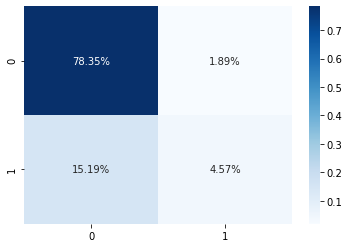

In [196]:
evaluate_model(loj)
plt.show() 

In [197]:
print("Test accurarcy {}".format(loj.score(x_test,y_test)))

Test accurarcy 0.8292170257488176


## KNN:

In [198]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_params = {"n_neighbors": np.arange(1,50)}

In [199]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [200]:
knn = KNeighborsClassifier(7)
knn_model = knn.fit(x_train, y_train)

In [201]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8124014713610089

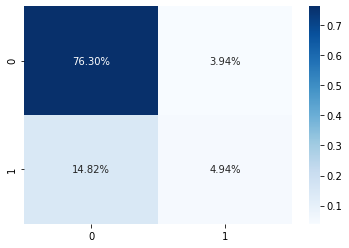

In [202]:
evaluate_model(knn_model)
plt.show() 

## Random Forest:

In [203]:
rf_model = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 1000)
rf_model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [204]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8339464004203888

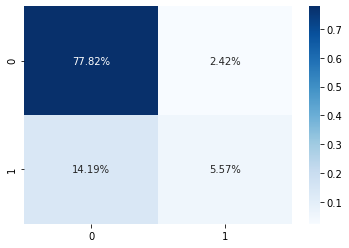

In [205]:
evaluate_model(rf_model)
plt.show() 

## SVM:

In [206]:
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8129269574356279

In [207]:
models = [
    knn_model,
    loj,
    rf_model,
    svm_model ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    L.append()

----------------------------
KNeighborsClassifier:
Accuracy: 81.2401%
----------------------------
LogisticRegression:
Accuracy: 82.9217%
----------------------------
RandomForestClassifier:
Accuracy: 83.3946%
----------------------------
SVC:
Accuracy: 81.2927%


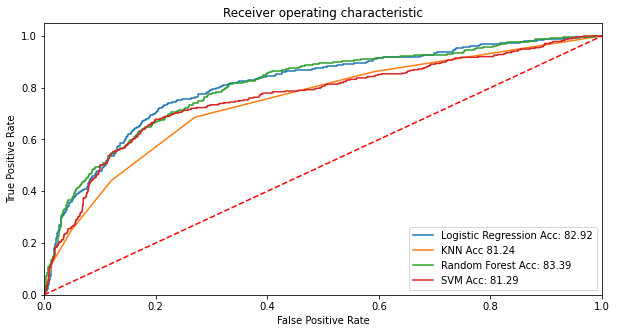

In [218]:
logistic_roc_auc = roc_auc_score(y_test, loj.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, loj.predict_proba(x_test)[:,1])
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
svm_roc_auc = roc_auc_score(y_test, svm_model.predict(x_test))
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_model.predict_proba(x_test)[:,1])

plt.figure(figsize=(10,5))



plt.plot(fpr, tpr, label='Logistic Regression Acc: 82.92' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN Acc 81.24' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest Acc: 83.39' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM Acc: 81.29' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



The best model amonst the ones implemented is Random Forests.